# **Implementation of Cosine Similarity Method for Netflix Recommendation**

Netflix Recommendation System is a system that can identify similar content by matching text-based features or in this case with title and description. So, one of the output of this project is to predict 10 movie title which have similar content with certain title. The dataset used in this project comes from the [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows) dataset.

## **Business Statement**
Based on its website on [netflix.com](https://help.netflix.com/en/node/412), Netflix is a subscription-based streaming service that allows members to watch TV shows and movies on an internet-connected device. Users can also download TV shows and movies to their devices and watch it without internet connection. Netflix have content varies by region and may change over time. You can watch a variety of award-winning Netflix originals, TV shows, movies, documentaries, and more. Netflix also have recommendation on TV shows and movies for their users to watch. The more you watch, the better Netflix gets at recommending TV shows and movies. So, this project is an implementation of recommendation system on Netflix dataset to predict similar TV shows and Movies based on its description genre.

**Problem Statement**

Based on the statement, the problems in this project are explained as follows:
- Based on certain title, how to identify any titles that has similar content?

**Goals**

the following goals:

- Predict 10 titles based on similarity of certain title with .

**Solution Statement**
So to achieve the desired goals, a recommendation system will be formed with the following flow.

1. Data Understanding
> Data Understanding is the initial stage of the project to understand data. In this case, we have 12 variables with missing values on 6 variables.

2. Univariate Exploratory Data Analysis
> Analyze and explore several variables in the data. 

3. Data Preparation
> This is the preparation of data before analyzing dataset with recommendation system.

4. Recommendation System with Cosine Similarity
> This step give several titles which have similarity based on certain titles. The title recommendation is obtained from the text similarity on titles and description. This method calculate the similarity of two vector, but in this case we have to vactorize the text first to calculate the similarity. The result of this methode is number of persentage similarity between two text. In order to get the title recommendation, we have to choose the largest similar number and get the title of TV Series or Movies and the description.

Let's get our hands dirty!!

## **Data Understanding**

The data in this project comes from [Netflix Movies and TV Shows dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows). 

**About this Dataset**: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Netflix dataset has 12 variables and description of these variables are as follows.

|Variable | Description|
|---|---|
|show_id	|	Unique ID for every Movie / Tv Show
|type	|	Identifier - A Movie or TV Show
|title	|	Title of the Movie / Tv Show
|director	|	Director of the Movie
|cast	|	Actors involved in the movie / show
|country	|	Country where the movie / show was produced
|date_added	|	Date it was added on Netflix
|release_year	|	Actual Release year of the movie / tv show
|rating	|	TV Rating of the movie / show
|duration	|	Total Duration - in minutes or number of seasons
|listed_in	|	Genre
|description	|	The summary description

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#import library
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from palettable.colorbrewer.qualitative import Pastel1_7
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#import data
netflix_titles = pd.read_csv('netflix_titles.csv')
netflix_titles.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_titles.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
print("Number of Rows: ", netflix_titles.shape[0], " data")
print("Number of Variables: ", netflix_titles.shape[1], " variable")

Number of Rows:  8807  data
Number of Variables:  12  variable


In [ ]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#categorical variable
#cat=['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in']


cat_variable = netflix_titles.drop('show_id', axis=1)
cat_variable = netflix_titles.drop('release_year', axis=1)

cat_variable.describe()


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**The table provides information that;**
1. in the 'show_id' and 'titles' columns, the value 'freq' is only one. So it can be concluded that the netflix_titles DataFrame presents different Movie/TV Show titles. **No duplicate data.**
2. Netflix tends to provide **Movies** compared to TV shows; this is from March 2019 to September 2021.
3. The top director who has given his Movie/TV Show works the most is **Rajiv Chilaka, 19 times**.
4. The performing artist who most often contributes to a Movie/TV Show is **David Attenborough, 19 times**.
5. The country that has donated the most Movie/TV Show works is **the United States**.
6. The highest number of Movies/TV Shows released by Netflix occurred on **January 1 2020**, with 109 Movies/TV Shows.
7. And the types of Movie/TV Show genres that are most often released by Netflix are the **Dramas and International Movies genres**.

It is known that the variable "date_added" is the date the Movie/TV Show was released on Netflix. **So the following shows a list of Movies/TV Shows that were released on January 1 2020.**

In [ ]:
netflix_titles[netflix_titles['date_added']=='January 1, 2020']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3051,s3052,Movie,Aruna & Her Palate,Edwin,"Dian Sastrowardoyo, Oka Antara, Hannah Al Rash...","Indonesia, South Korea, Singapore","January 1, 2020",2018,TV-14,106 min,"Dramas, International Movies",An epidemiologist turns her nationwide bird fl...
3052,s3053,TV Show,Because This Is My First Life,NaN,"Lee Min-ki, Jung So-min, Esom, Kim Ga-eun, Par...",South Korea,"January 1, 2020",2017,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Two housemates get married for financial conve...
3053,s3054,TV Show,Border Security: America's Front Line,NaN,NaN,Canada,"January 1, 2020",2018,TV-14,1 Season,"Crime TV Shows, International TV Shows, Realit...",This reality series chronicles the behind-the-...
3054,s3055,Movie,Breaking the Bank,Vadim Jean,"Kelsey Grammer, Tamsin Greig, John Michael Hig...",United Kingdom,"January 1, 2020",2014,TV-PG,105 min,"Comedies, International Movies",Bank chairman Charles Bunbury – who knows next...
3055,s3056,TV Show,Cells at Work!,NaN,"Kana Hanazawa, Tomoaki Maeno, Daisuke Ono, Kik...",Japan,"January 1, 2020",2018,TV-PG,1 Season,"Anime Series, Teen TV Shows",One newcomer red blood cell just wants to do h...
...,...,...,...,...,...,...,...,...,...,...,...,...
8664,s8665,Movie,Up in the Air,Jason Reitman,"George Clooney, Vera Farmiga, Anna Kendrick, J...",United States,"January 1, 2020",2009,R,110 min,"Comedies, Dramas, Romantic Movies",Ryan Bingham flies around the country firing e...
8722,s8723,Movie,What Lies Beneath,Robert Zemeckis,"Harrison Ford, Michelle Pfeiffer, Diana Scarwi...",United States,"January 1, 2020",2000,PG-13,130 min,"Horror Movies, Thrillers",When Claire Spencer starts hearing ghostly voi...
8742,s8743,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch..."
8745,s8746,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany","January 1, 2020",1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...


Or we can look at the list of Movies/TV Shows that Netflix will release on **September 24, 2021**.

In [ ]:
netflix_titles[netflix_titles['date_added']=='September 24, 2021']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


On September 24 2021, **Netflix only released 10 Movies/TV Shows**.

## **Data Preprocessing**

In [ ]:
netflix_titles.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing values are in:

- "director": Very little information -even though I have searched the internet, the information on the name of the director of the Movie/TV Show is still very minimal, and the truth cannot be confirmed- so I will be dropping this.
- "cast": there are too many different values, so I will be dropping this.
- "country": Important variable so we need to fix it
- "duration": there are only a few cases -where an error occurs during data entry- so let's fix it
- "rating": there are only a few cases, so let's fix it.
- "date_added": there are only a few cases -and I can't find out in the Internet- so I will drop these as they are only 10 rows

### **Fix missing value in the variable 'director', 'cast', and 'country'**

In [ ]:
#drop variable director and cast
netflix_titles.drop(['director','cast'], axis=1, inplace=True)

#fix missing value in the variable country
netflix_titles['country'] = netflix_titles['country'].fillna(netflix_titles['country'].mode()[0])
print('Now we have ',netflix_titles.shape[1], 'varibles')

Now we have  10 varibles


Where "country" has multiple values. So I decided to add a new column with just the first one so we can check which regions have more productions.

In [ ]:
# Lets retrieve just the first country
netflix_titles['principal_country'] = netflix_titles['country'].apply(lambda x: x.split(",")[0])
print('after we are include variable principal_country, we have ',netflix_titles.shape[1], 'variables')

after we are include variable principal_country, we have  11 variables


###**Fix misisng value in the variable 'duration'**

In [ ]:
netflix_titles[netflix_titles['duration'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,principal_country
5541,s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",United States
5794,s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,United States
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,United States


There is 3 duration data that has been misplace as a rating, so we have to replace the data

In [ ]:
#replace NaN value of duration variable with rating
netflix_titles['duration'][netflix_titles[netflix_titles['duration'].isna()].index] = netflix_titles['rating'][netflix_titles[netflix_titles['duration'].isna()].index]
#remove data entry errors in variable rating
netflix_titles['rating'] = netflix_titles['rating'].replace(['74 min', '84 min', '66 min'], np.NaN)
netflix_titles['duration'].isna().sum()

<ipython-input-14-5f9d6d303fe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_titles['duration'][netflix_titles[netflix_titles['duration'].isna()].index] = netflix_titles['rating'][netflix_titles[netflix_titles['duration'].isna()].index]


0

###**Fix misisng vallue in the variable 'rating'**

In [ ]:
netflix_titles['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
netflix_titles[netflix_titles['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,principal_country
5541,s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",United States
5794,s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,United States
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,United States
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,United States
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",Japan
7312,s7313,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",Australia
7537,s7538,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",Italy


Since there are only 7 rows missing, and I can find the information on the internet, so I replace the missing value with information, what we get.

In [ ]:
#get index of 'rating'
netflix_titles.columns.get_loc('rating')

6

In [ ]:
#fix missing value rating
rating_replacements = {
    5541: 'TV-MA',
    5794: 'NR',
    5813: 'TV-MA',
    5989: 'TV-PG',
    6827: 'TV-14',
    7312: 'TV-MA',
    7537: 'TV-MA '
}

for id, rate in rating_replacements.items():
    netflix_titles.iloc[id, 6] = rate
    
netflix_titles['rating'].isna().sum()

0

###**Fix missing value in the 'date_added'**

In [ ]:
#fix missing value in the variable date_added
netflix_titles=netflix_titles.dropna(axis=0)
# axis=0 for drop rows and axis=1 for drop column
print('Now we have ', netflix_titles.shape[0], ' data for the analysis')
print('And we have ', netflix_titles.shape[1], ' variable for the analysis')

Now we have  8797  data for the analysis
And we have  11  variable for the analysis


## **Data Visualization**

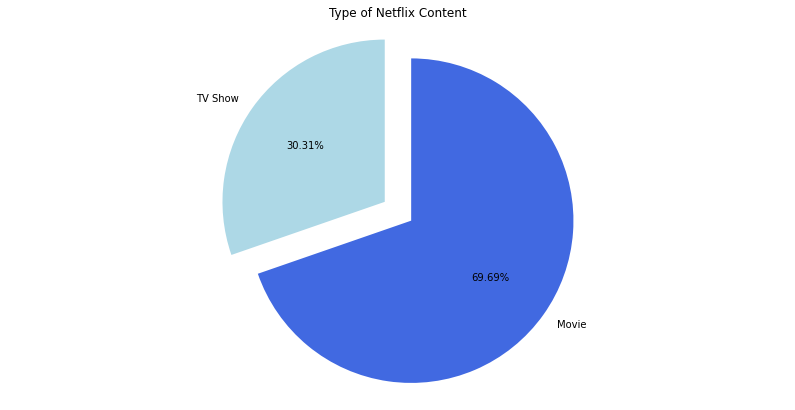

In [ ]:
# # Create a circle at the center of the plot
# my_circle = plt.Circle( (0,0), 0.4, color='white')
# netflix_titles.type.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', colors=Pastel1_7.hex_colors, title="Type of Titles")
# p = plt.gcf()
# p.gca().add_artist(my_circle)
# # Show the graph
# plt.show()

plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(netflix_titles['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

There are more movies titles than TV show titles in Netflix. This is proofen by the persentage rates of types of titles which has 69.7% movies titiles and the rest is TV show titles.

Exploratory netflix data divided into 2 dataset, which is netflix titles for TV show and netflix titles for movies

In [ ]:
netflix_show = netflix_titles[netflix_titles['type']=='TV Show']
netflix_movies = netflix_titles[netflix_titles['type']=='Movie']

### **Rating**

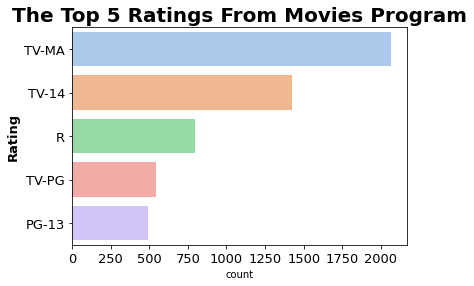

In [ ]:
movie_ratings = netflix_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
#fig_dims = (15,7)
#fig, ax = plt.subplots(figsize=fig_dims)  
sns.barplot(x='count',y='rating',data=movie_ratings.head(5), palette='pastel')
plt.ylabel('Rating', fontsize=13, fontweight='bold')
plt.title('The Top 5 Ratings From Movies Program',size='20', fontweight='bold')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

Most Movies has ratings TV-MA, TV-14, and R

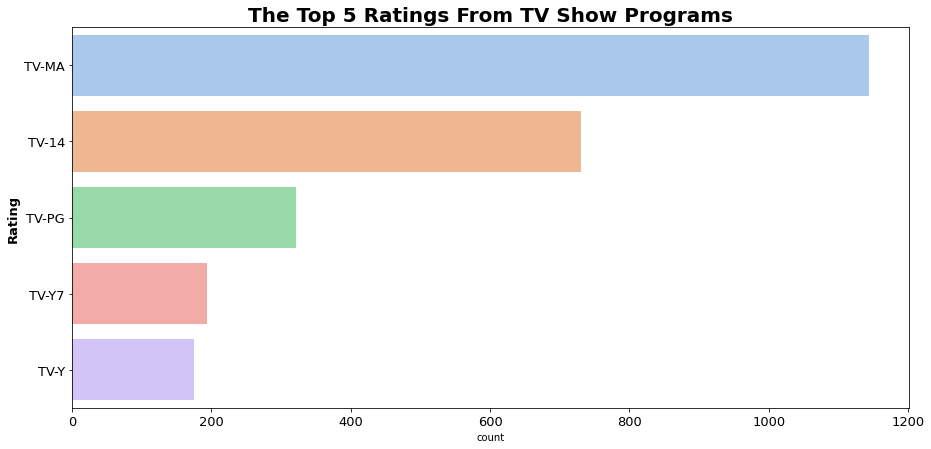

In [ ]:
tv_ratings = netflix_show.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (15,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.barplot(x='count',y='rating',data=tv_ratings.head(5),  palette='pastel', )
plt.title('The Top 5 Ratings From TV Show Programs',size='20', fontweight='bold')
plt.ylabel('Rating', fontsize=13, fontweight='bold')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

Most TV shows has ratings TV-MA, TV-14, and TV-PG

### **Release Year**

Relase Year for Movie categories

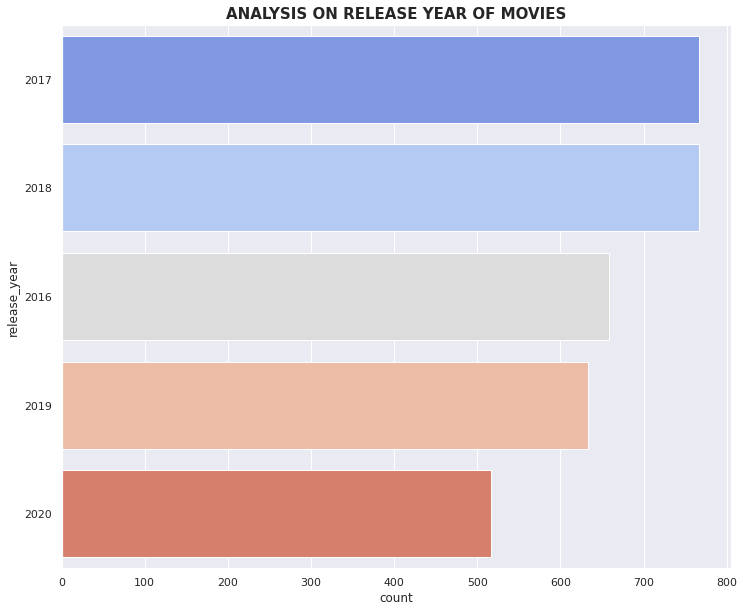

In [ ]:
#release year for Movies categories
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="coolwarm", order=netflix_movies['release_year'].value_counts().index[0:5])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

Release Year for TV Show Program

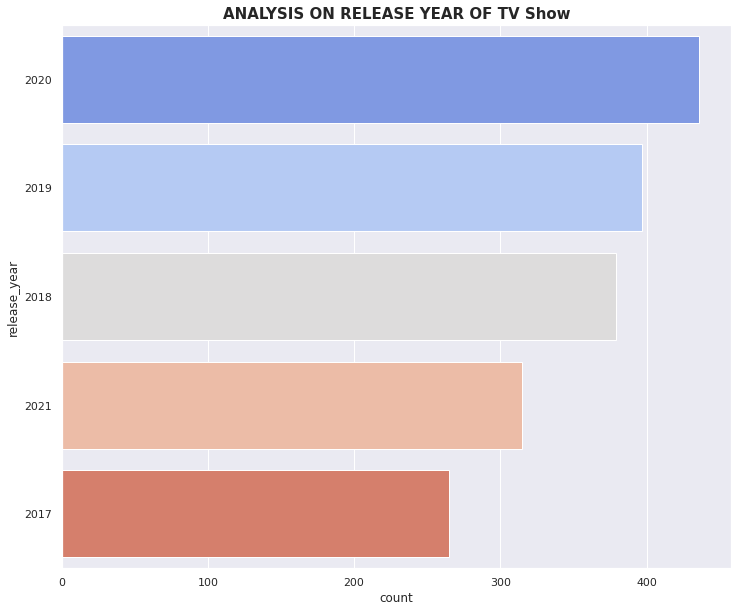

In [ ]:
#release year for TV Show categories
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_show, palette="coolwarm", order=netflix_show['release_year'].value_counts().index[0:5])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

### **Listed_in (Genre)**

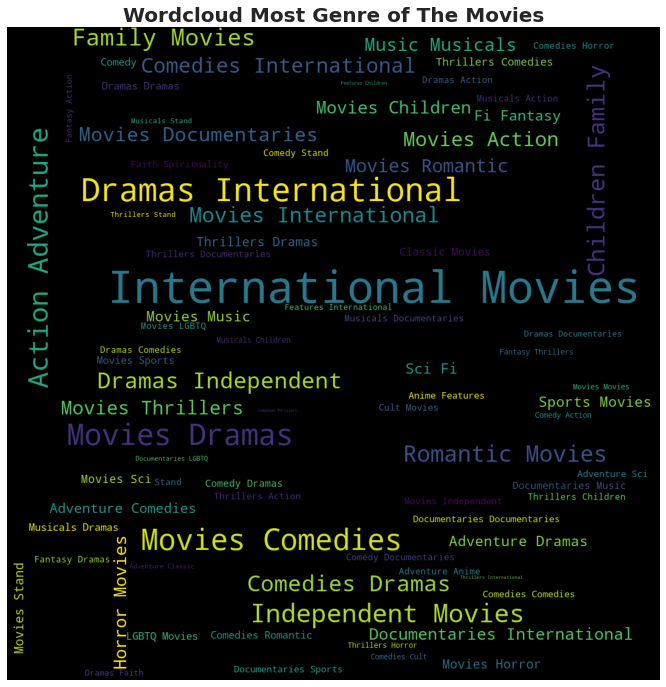

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(netflix_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 80).generate(text)
plt.imshow(wordcloud)
plt.title('Wordcloud Most Genre of The Movies', size=20, fontweight='bold')
plt.axis('off')
plt.show()

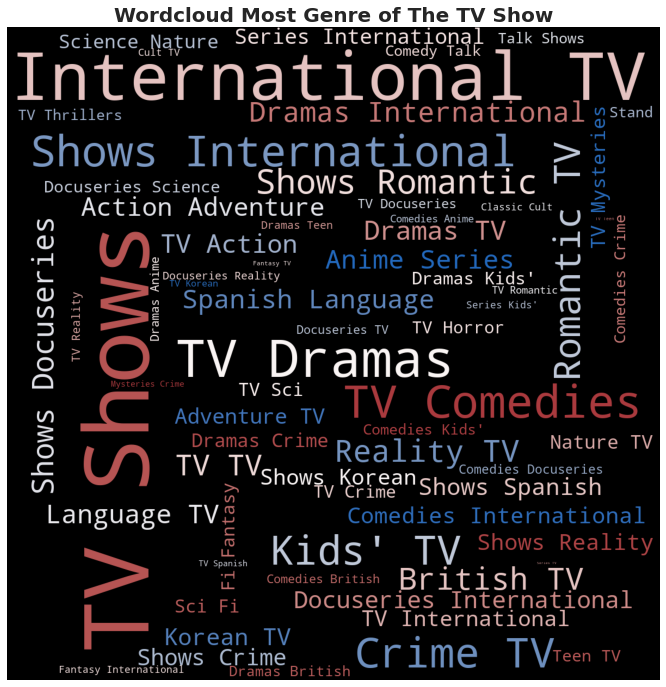

In [ ]:
text = ' '.join(netflix_show['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.title('Wordcloud Most Genre of The TV Show', size=20, fontweight='bold')
plt.axis('off')
plt.show()

### **Top Country**

In [ ]:
netflix_titles['country'].value_counts().head(10)

United States     3642
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

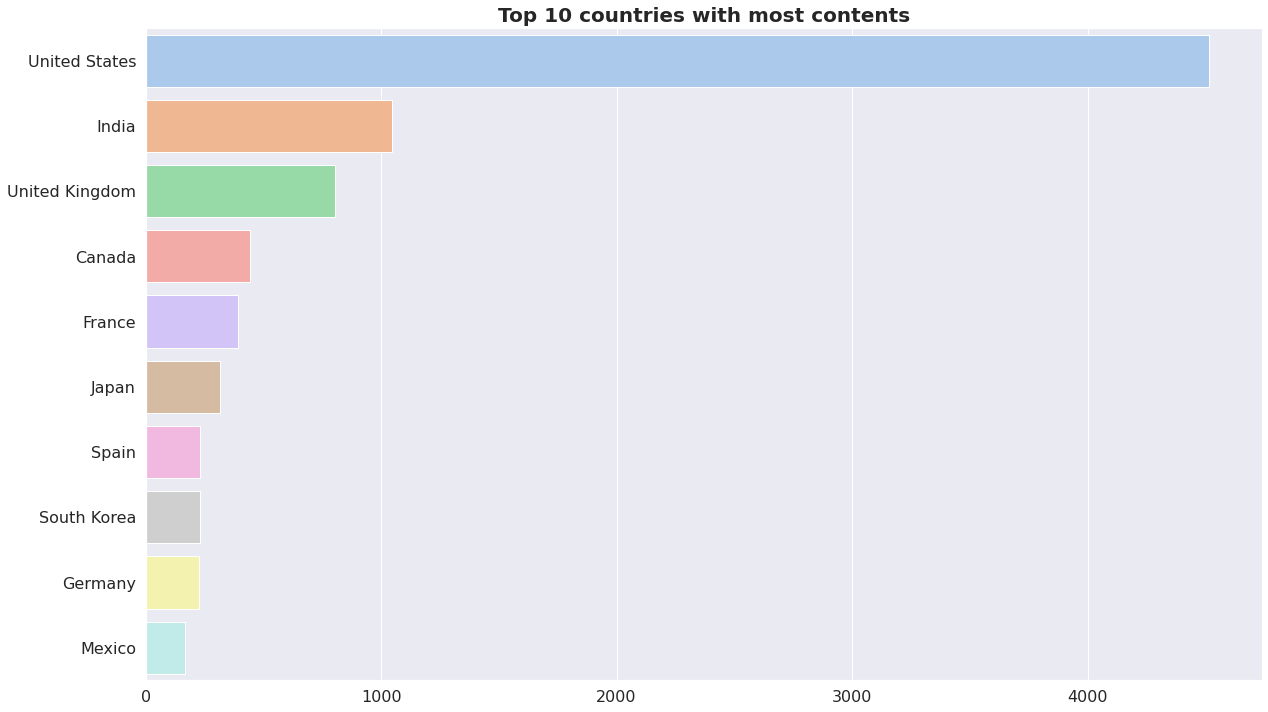

In [ ]:
from collections import Counter
country_data = netflix_titles['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top10country = country_count.head(10)

plt.figure(figsize=(20,12))
# sns.set(style="darkgrid")
sns.barplot(x= top10country, y=top10country.index, palette="pastel")
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Top 10 countries with most contents', fontsize=20, fontweight='bold')
plt.show()

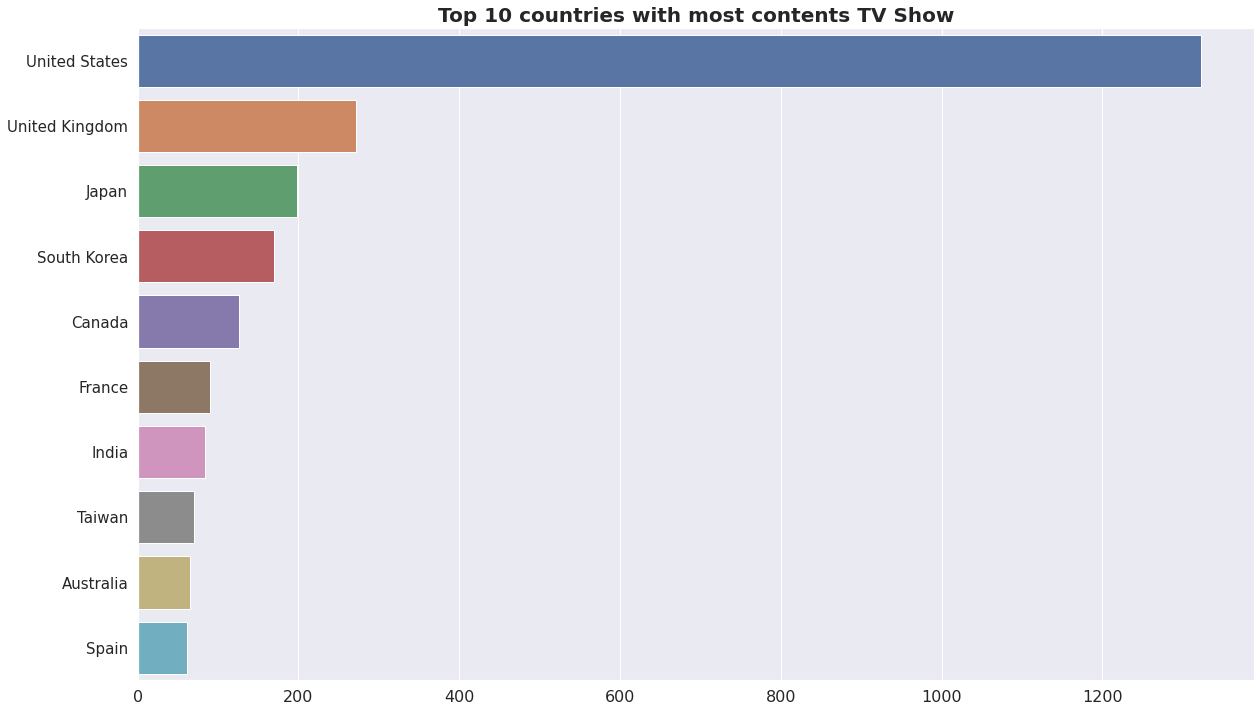

In [ ]:
country_data = netflix_show['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top10countryshow = country_count.head(10)
plt.figure(figsize=(20,12))
sns.barplot(x= top10countryshow, y=top10countryshow.index)
plt.xticks(size=16)
plt.yticks(size=15)
plt.title('Top 10 countries with most contents TV Show', fontsize=20, fontweight='bold')
plt.show()

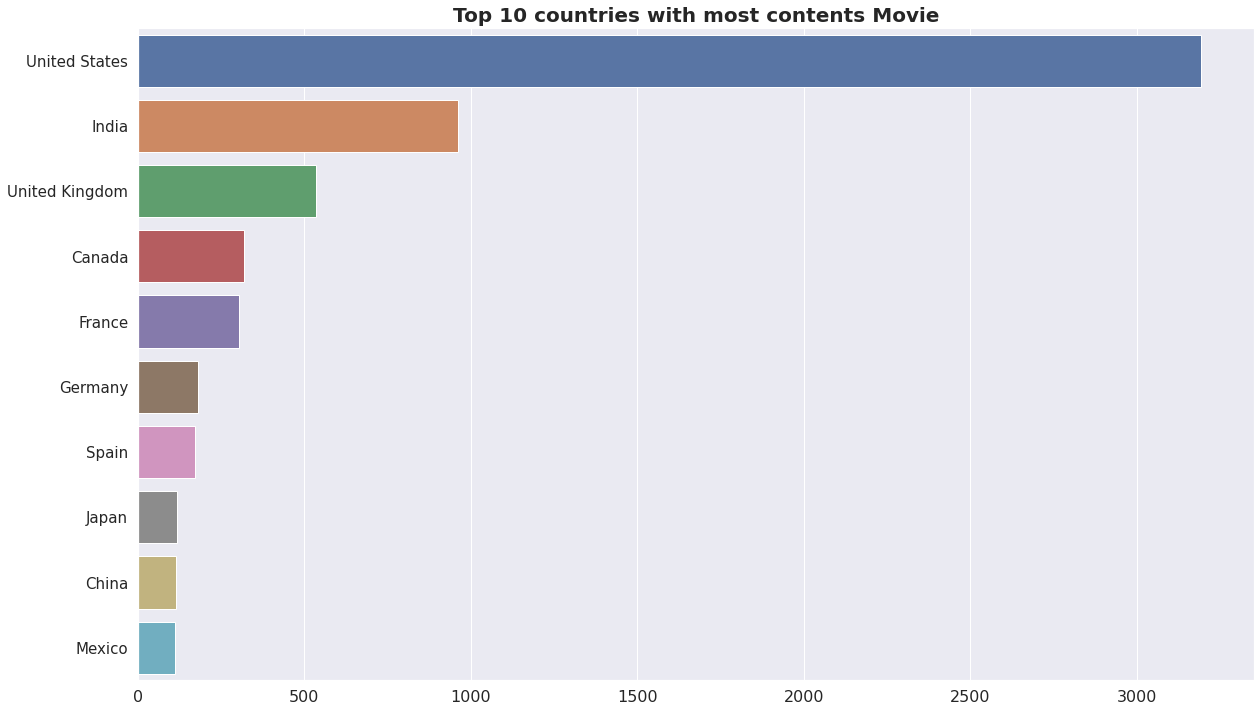

In [ ]:
country_data = netflix_movies['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top10countrymovie = country_count.head(10)
plt.figure(figsize=(20,12))
sns.barplot(x= top10countrymovie, y=top10countrymovie.index)
plt.xticks(size=16)
plt.yticks(size=15)
plt.title('Top 10 countries with most contents Movie', fontsize=20, fontweight='bold')
plt.show()

## **Netflix Recommendation System with Cosine similarity**

This code from [Netflix_Recommendation_System](https://www.kaggle.com/code/karen1116/netflix-recommendation-system)

### **Cosine with Description**

In [ ]:
vectorizer = TfidfVectorizer()
transform = vectorizer.fit_transform(netflix_titles['description'])
cs = cosine_similarity(transform, transform)

In [ ]:
data = netflix_titles['title']

def netflix_recommendations_description(title, cs=cs):
  title_search = pd.Index(data).get_loc(title)
  sim = list(enumerate(cs[title_search]))
  sim = sorted(sim, key=lambda x: x[1], reverse = True)
  top_ten = sim[1:11]
  recom = [i[0] for i in top_ten]
  return netflix_titles[['title', 'description']].iloc[recom]

### **Running Model (cosine with description)**

In [ ]:
netflix_recommendations_description('Sankofa')

,title,description
8353,The Hunt,Witness some of the most riveting showdowns in...
7037,I Am Jane Doe,This intense documentary follows real cases of...
3619,I'm Brent Morin,"In a witty solo show, Brent Morin serves up in..."
5044,When We First Met,Using a magical photo booth that sends him bac...
5580,One More Time,This fantasy drama follows an indie band singe...
7700,Palm Trees in the Snow,"Finding a tantalizing clue in an old letter, a..."
3094,The App,"While in Rome to shoot his first movie, actor ..."
2824,The Valhalla Murders,An Oslo detective with a painful past returns ...
5653,My Runway,An egotistic top male model and a pretty model...
7904,Running for Grace,"In 1920s Hawaii, a young man of mixed race and..."


###**Cosine with genre**

In [ ]:
vectorizer_genre = TfidfVectorizer()
transform_genre = vectorizer_genre.fit_transform(netflix_titles['listed_in'])
cs_genre = cosine_similarity(transform_genre, transform_genre)

In [ ]:
data = netflix_titles['title']

def netflix_recommendations_genre(title, cs=cs):
  title_search_genre = pd.Index(data).get_loc(title)
  sim_genre = list(enumerate(cs_genre[title_search_genre]))
  sim_genre = sorted(sim_genre, key=lambda x: x[1], reverse = True)
  top_ten_genre = sim_genre[1:11]
  recom_genre = [i[0] for i in top_ten_genre]
  return netflix_titles[['title',  'listed_in']].iloc[recom_genre]

### **Running Model (cosine with genre)**

In [ ]:
netflix_recommendations_genre('Sankofa')

,title,listed_in
30,Ankahi Kahaniya,"Dramas, Independent Movies, International Movies"
206,"LSD: Love, Sex Aur Dhokha","Dramas, Independent Movies, International Movies"
282,La diosa del asfalto,"Dramas, Independent Movies, International Movies"
339,I missed you: Director's Cut,"Dramas, Independent Movies, International Movies"
365,Eyes of a Thief,"Dramas, Independent Movies, International Movies"
371,Pomegranates and Myrrh,"Dramas, Independent Movies, International Movies"
394,African America,"Dramas, Independent Movies, International Movies"
633,Into the Wind,"Dramas, Independent Movies, International Movies"
698,Fan Girl,"Dramas, Independent Movies, International Movies"
750,Tragic Jungle,"Dramas, Independent Movies, International Movies"


In [ ]:
netflix_recommendations_genre('Zodiac')

,title,listed_in
7667,Only God Forgives,"Cult Movies, Independent Movies, Thrillers"
6753,Final Destination,"Cult Movies, Horror Movies, Thrillers"
1862,Disco Dancer,"Cult Movies, Dramas, International Movies"
6147,American Psycho,"Comedies, Cult Movies, Dramas"
6450,Chasing Amy,"Comedies, Cult Movies, Dramas"
6743,Fear and Loathing in Las Vegas,"Comedies, Cult Movies, Dramas"
7944,Satte Pe Satta,"Comedies, Cult Movies, Dramas"
8072,Spring Breakers,"Comedies, Cult Movies, Dramas"
8614,Trainspotting,"Comedies, Cult Movies, Dramas"
144,House Party,"Comedies, Cult Movies"


In [ ]:
netflix_recommendations_genre('Stranger Things')

,title,listed_in
3187,Nightflyers,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy"
3685,Stranger Things,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy"
6953,Helix,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy"
241,Manifest,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy"
3986,The OA,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy"
5287,The Vampire Diaries,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy"
5939,The 4400,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy"
8421,The Messengers,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy"
2190,The Umbrella Academy,"TV Action & Adventure, TV Mysteries, TV Sci-Fi..."
2303,Warrior Nun,"TV Action & Adventure, TV Mysteries, TV Sci-Fi..."


Thanks to:
1. [Netflix Movies and TV Shows EDA](https://www.kaggle.com/code/bhartiprasad17/netflix-movies-and-tv-shows-eda#-4.-Data-Visualization-)
2. [Netflix Dataset | Cleaning + Dashboard](https://www.kaggle.com/code/zhukovoleksiy/netflix-dataset-cleaning-dashboard)
3. [Netflix_Recommendation_System](https://www.kaggle.com/code/karen1116/netflix-recommendation-system)